<a href="https://colab.research.google.com/github/spaceladymehwish/Function/blob/master/capstone_project_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

#import from sklearn library

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, confusion_matrix

# For visualizing Decision Tree
from sklearn import tree
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import os

In [6]:
df = pd.read_csv("/content/water_potability.csv")

In [7]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [16]:
potability = pd.DataFrame(df["Potability"].value_counts())
colors = ["grey", "lightblue"]
fig = px.pie(data_frame=potability, names=["Not Potable", "Potable"], values="Potability", hole=0.35, opacity=0.8, labels={"label": "Potability", "Potability": "Number of Samples"}, color_discrete_sequence=colors)
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In [18]:
df['Potability'].value_counts() # A 1 means that the water is potable, 0 means that the water is not potable.

0    1998
1    1278
Name: Potability, dtype: int64

In [22]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


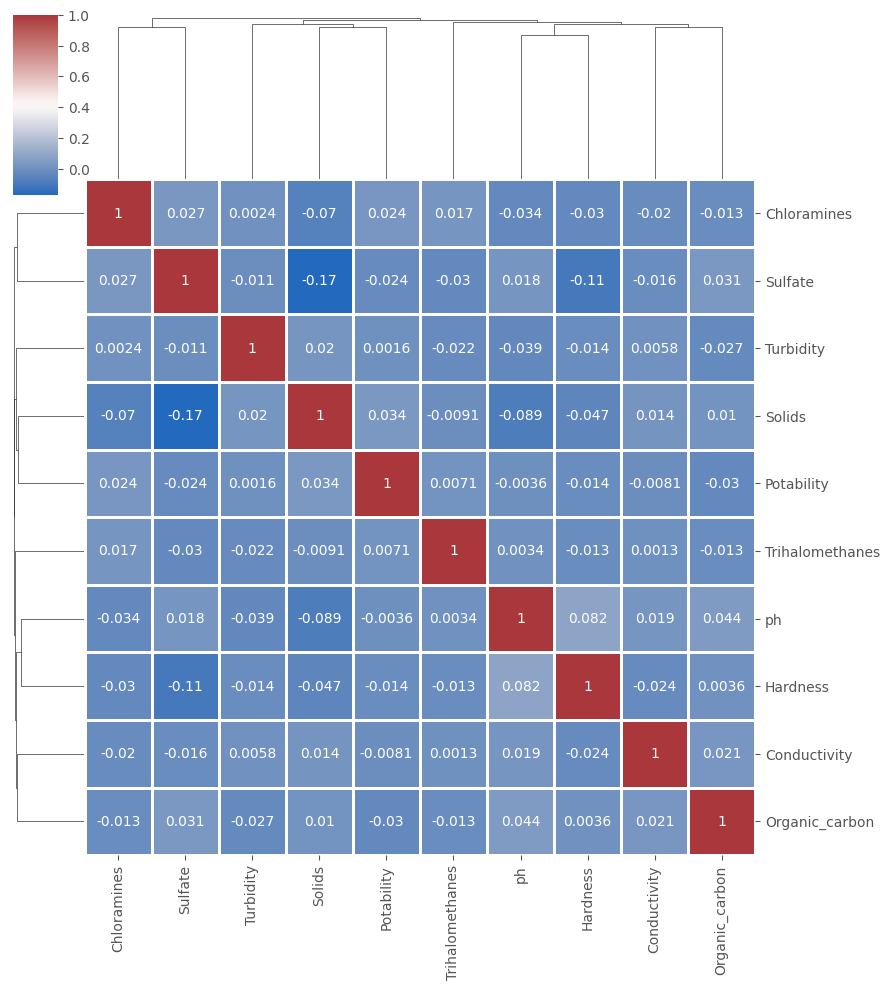

In [23]:
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.8, figsize=(9, 10))
plt.show()  # The figure shows that there is no direct correlation between our dependent variable "Potability" and the other independent variables. This means that we can use all the independent variables as a source of information for classification.

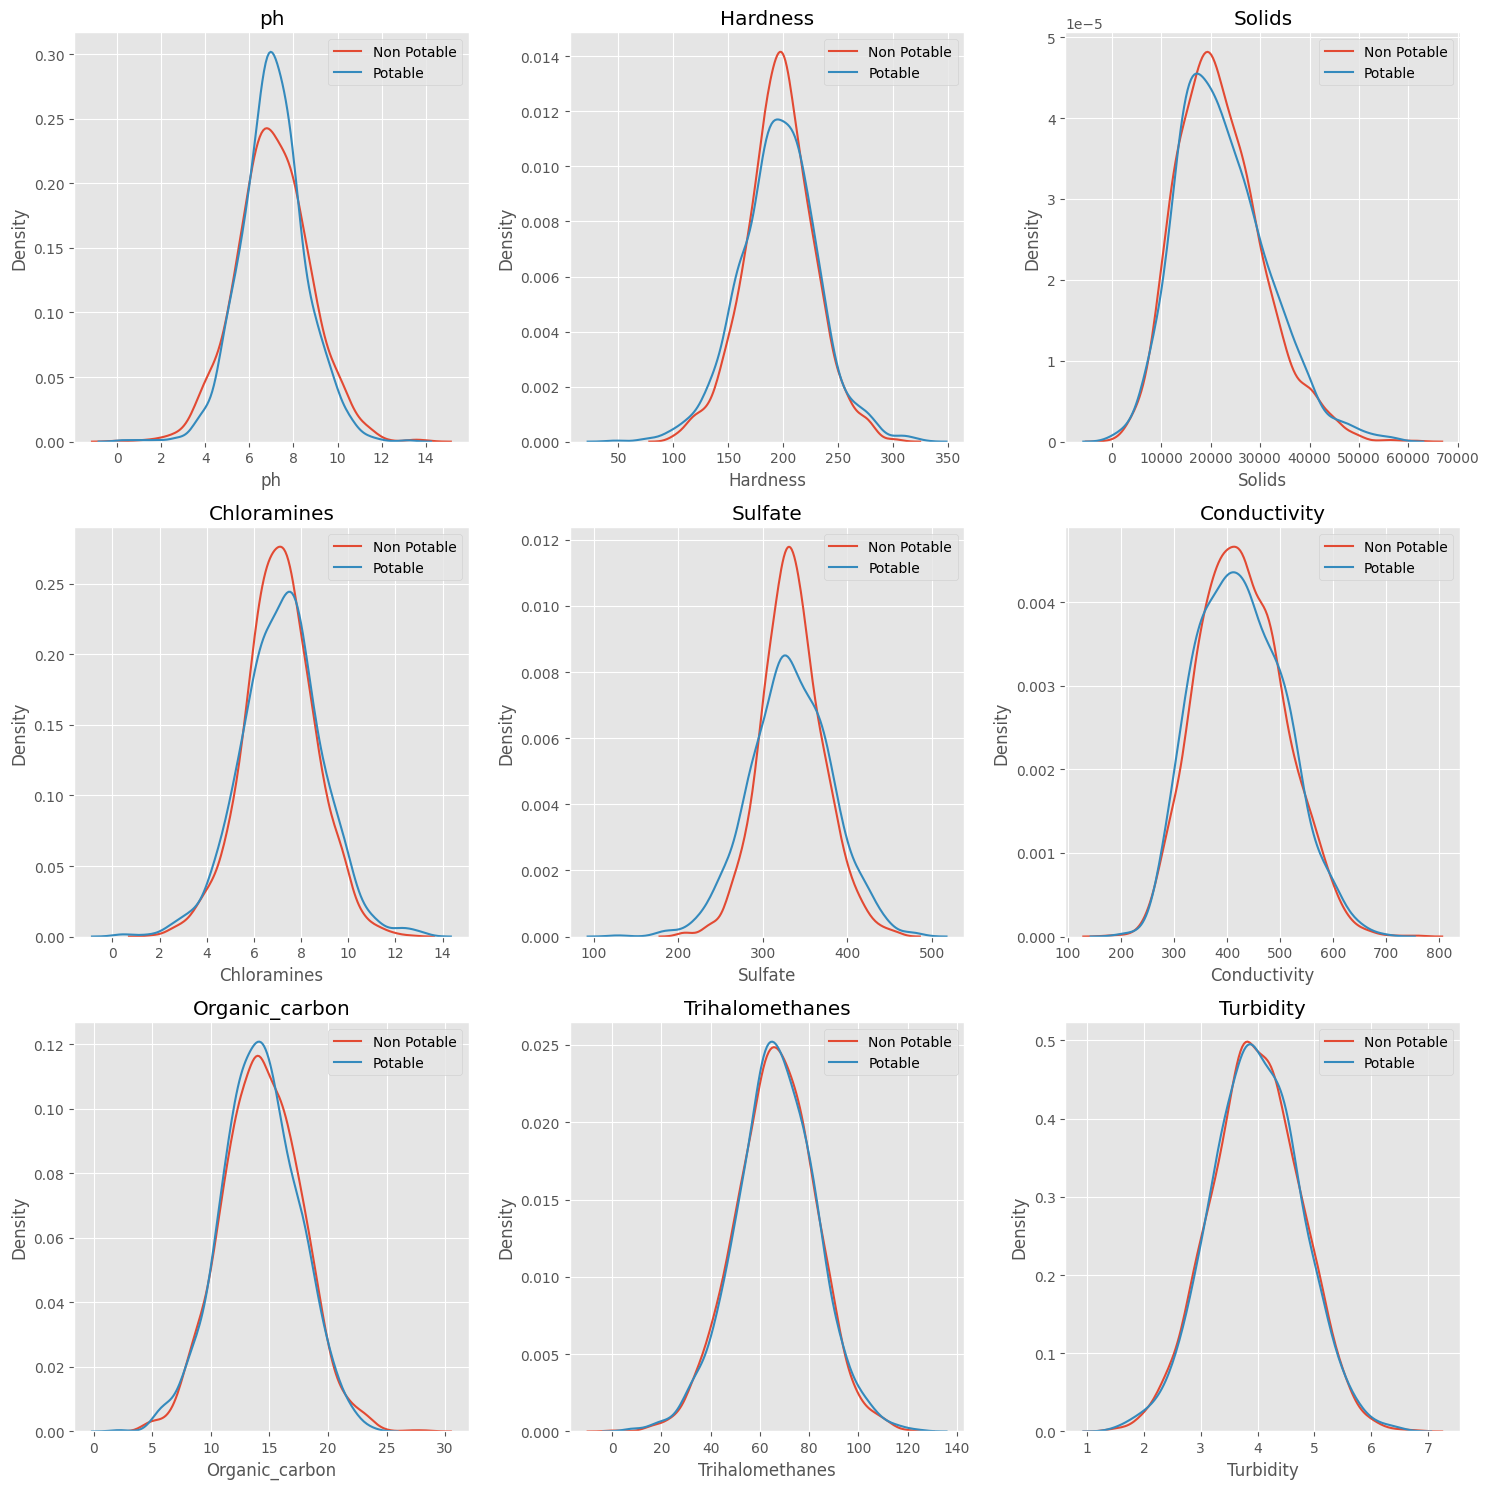

In [24]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))

for row, col in enumerate(df.columns[: 9]):
    # df.columns[: 9] because the 10th column is also "Potability"
    plt.subplot(3, 3, row + 1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

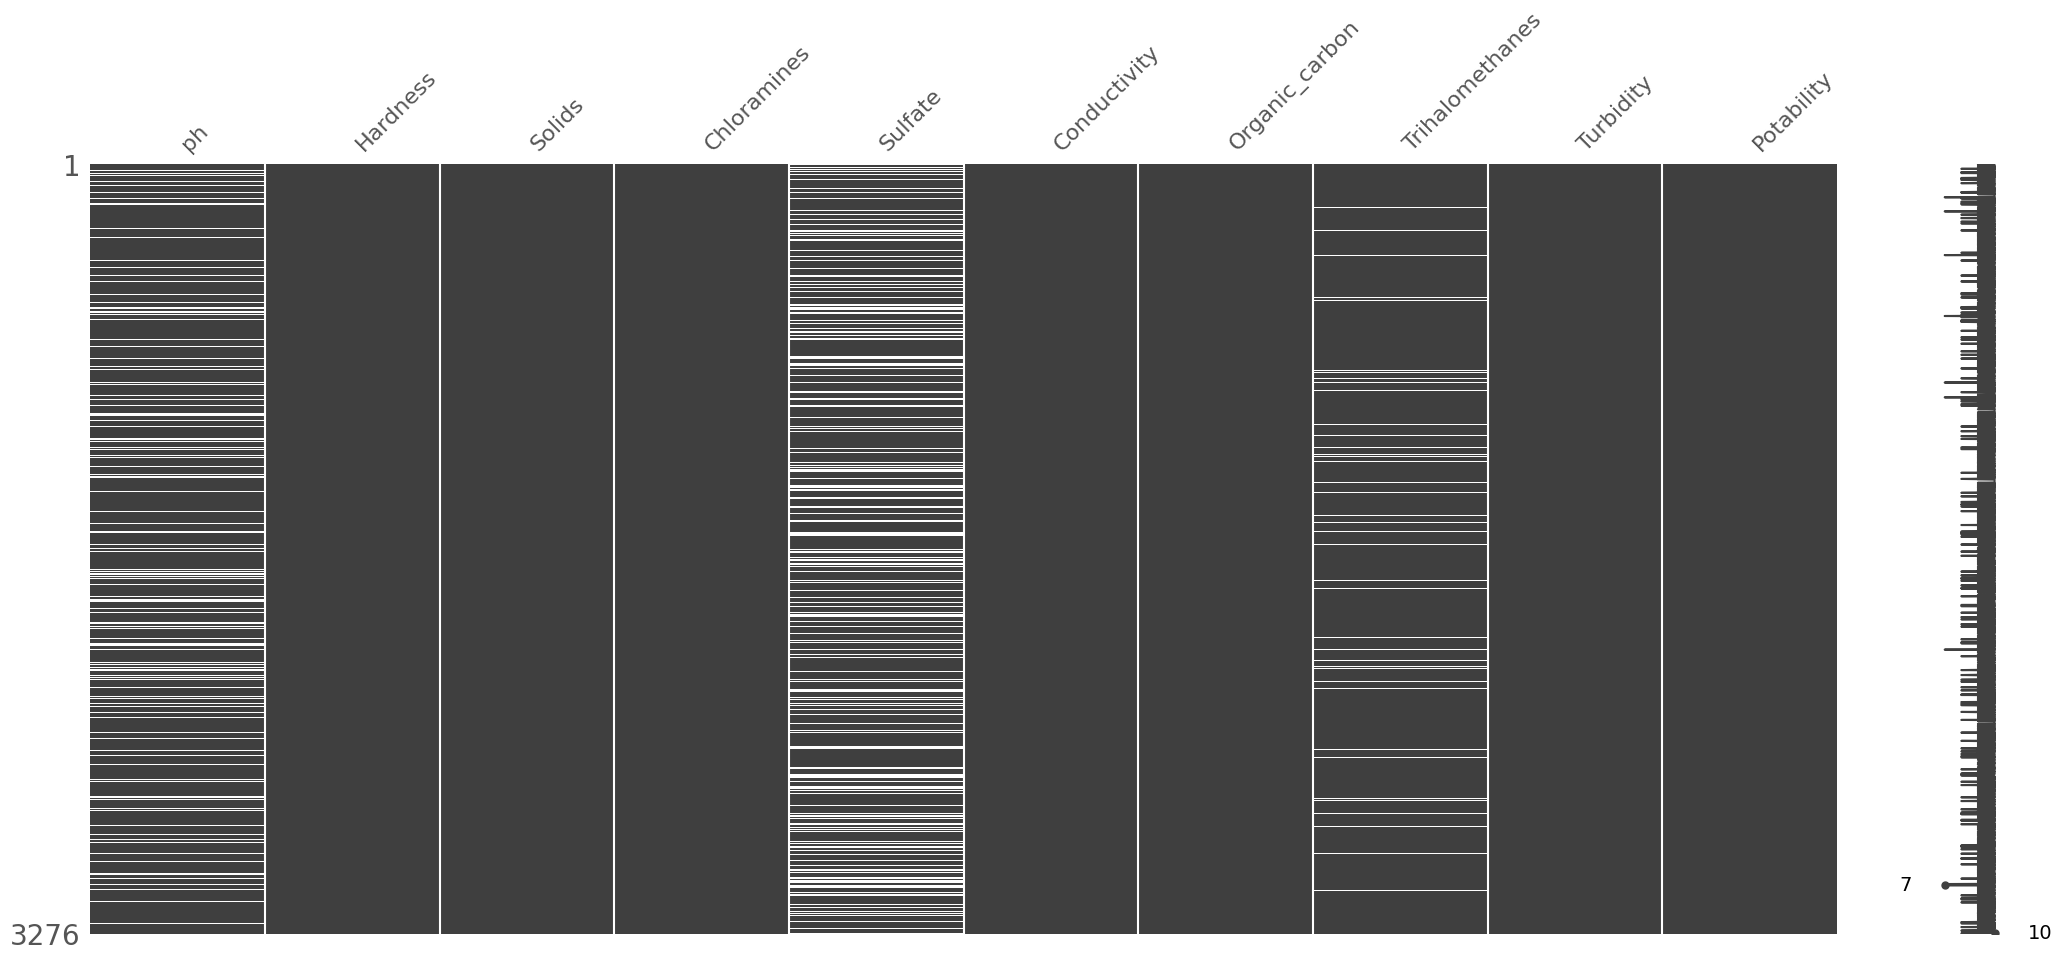

In [26]:
# Check missing values by using msno.matrix()
msno.matrix(df)
plt.show()

# The plot shows that there are missing values in three variables: "ph", "Sulfate", and "Trihalomethanes". Particularly, the variables "ph" and "Sulfate" have a significant number of missing values.
# When we dive into the previous plots of "ph", "Sulfate", and "Trihalomethanes" variables, it is observed that they exhibit a Gaussian Distribution (Normal Distribution).
# This means that if we fill the missing values of these variables with the mean or median values, we will not distort the data.

In [27]:
# Check missing value counts
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [28]:
# Check median and mean values for missing value features # These 3 variables exhibit a Gaussian Distribution (Normal Distribution) so their mean or median values are usable for missing values.
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    print(f"{col} median value is: {df[col].median()}")
    print(f"{col} mean value is: {df[col].mean()}\n")

ph median value is: 7.036752103833548
ph mean value is: 7.080794504276835

Sulfate median value is: 333.073545745888
Sulfate mean value is: 333.7757766108135

Trihalomethanes median value is: 66.62248509808484
Trihalomethanes mean value is: 66.39629294676803



In [29]:
# Handling missing value with average of features
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    df[col].fillna(value=df[col].mean(), inplace=True)

In [30]:
# Check again the missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [31]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [32]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [33]:
models = [("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
         ("Random Forest Classifier", RandomForestClassifier())]

In [34]:
final_results = []
confusion_matrix_list = []

for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    final_results.append((name, score))
    confusion_matrix_list.append((name, cm))

In [35]:
# Check precision_score list
final_results

[('Decision Tree Classifier', 0.5652173913043478),
 ('Random Forest Classifier', 0.6076555023923444)]

In [36]:
confusion_matrix_list

[('Decision Tree Classifier',
  array([[515,  80],
         [284, 104]])),
 ('Random Forest Classifier',
  array([[513,  82],
         [261, 127]]))]

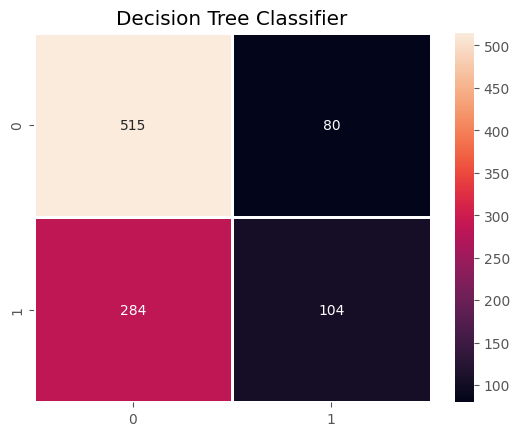

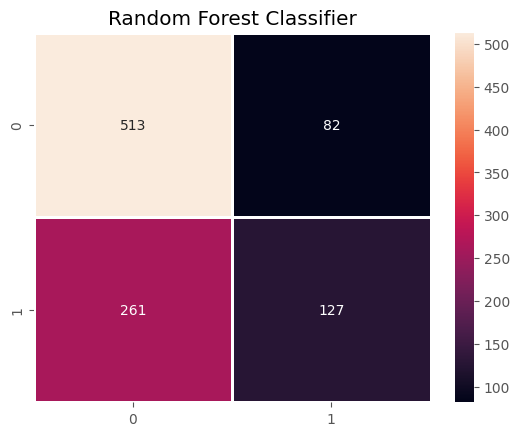

In [37]:
# Visualization of Confusion Matrix for our prediction
for name, i in confusion_matrix_list:
    plt.figure()
    sns.heatmap(data=i, annot=True, linewidths=0.8, fmt=".0f")
    plt.title(name)
    plt.show()  #final_results list and this chart demonstrate of Random Forest Classifier has better results than Decision Tree Classifier in our data.

In [38]:
df_clf = models[0][1]
df_clf

DecisionTreeClassifier(max_depth=3)

In [39]:
df.columns.tolist()[:-1]

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

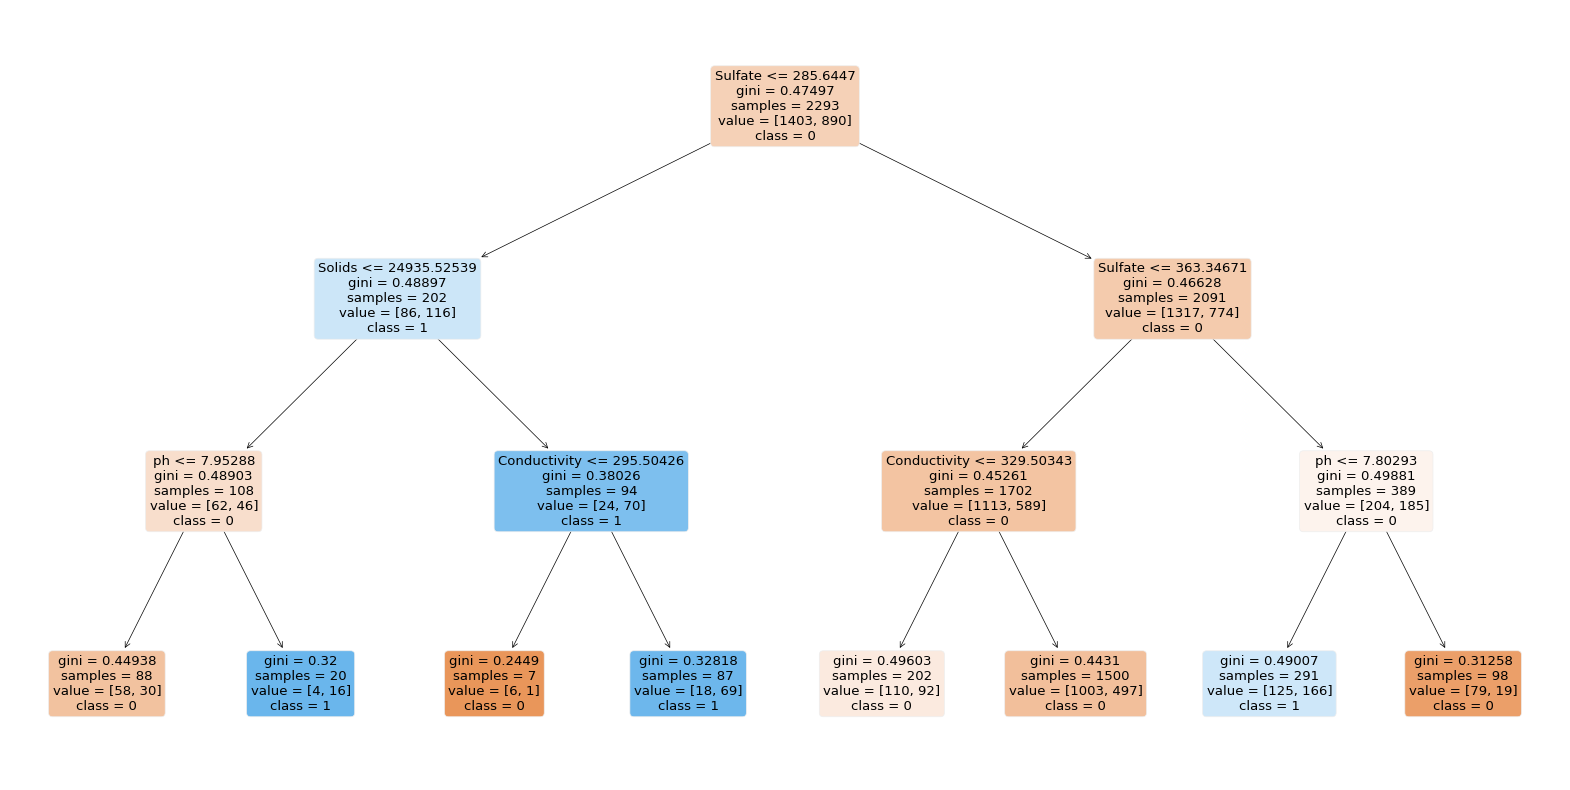

In [40]:
plt.figure(figsize=(20,10))

tree.plot_tree(decision_tree=df_clf,
              feature_names=df.columns.tolist()[:-1],
              class_names=["0", "1"],
              filled=True,
              rounded=True,
              precision=5)

plt.show()

In [41]:
model_params = {
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10, 50, 100],
            "max_features": ["sqrt", "log2"],
            "max_depth": list(range(1, 21, 3))
        }
    }
}

model_params #Random Forest Hyperparameter Tuning

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [42]:
# Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

scores = []

for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv=cv, n_iter=10)
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 19},
  0.6735293706944703]]

In [43]:
# Defining best parameters and modelling again
best_params = {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 16}

new_model = RandomForestClassifier(**best_params)

In [49]:
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_features='log2')

In [50]:
new_model_result = new_model.predict(X_test)
new_score = precision_score(y_test, new_model_result)

print("New Precision Score: ", new_score)

New Precision Score:  0.6153846153846154


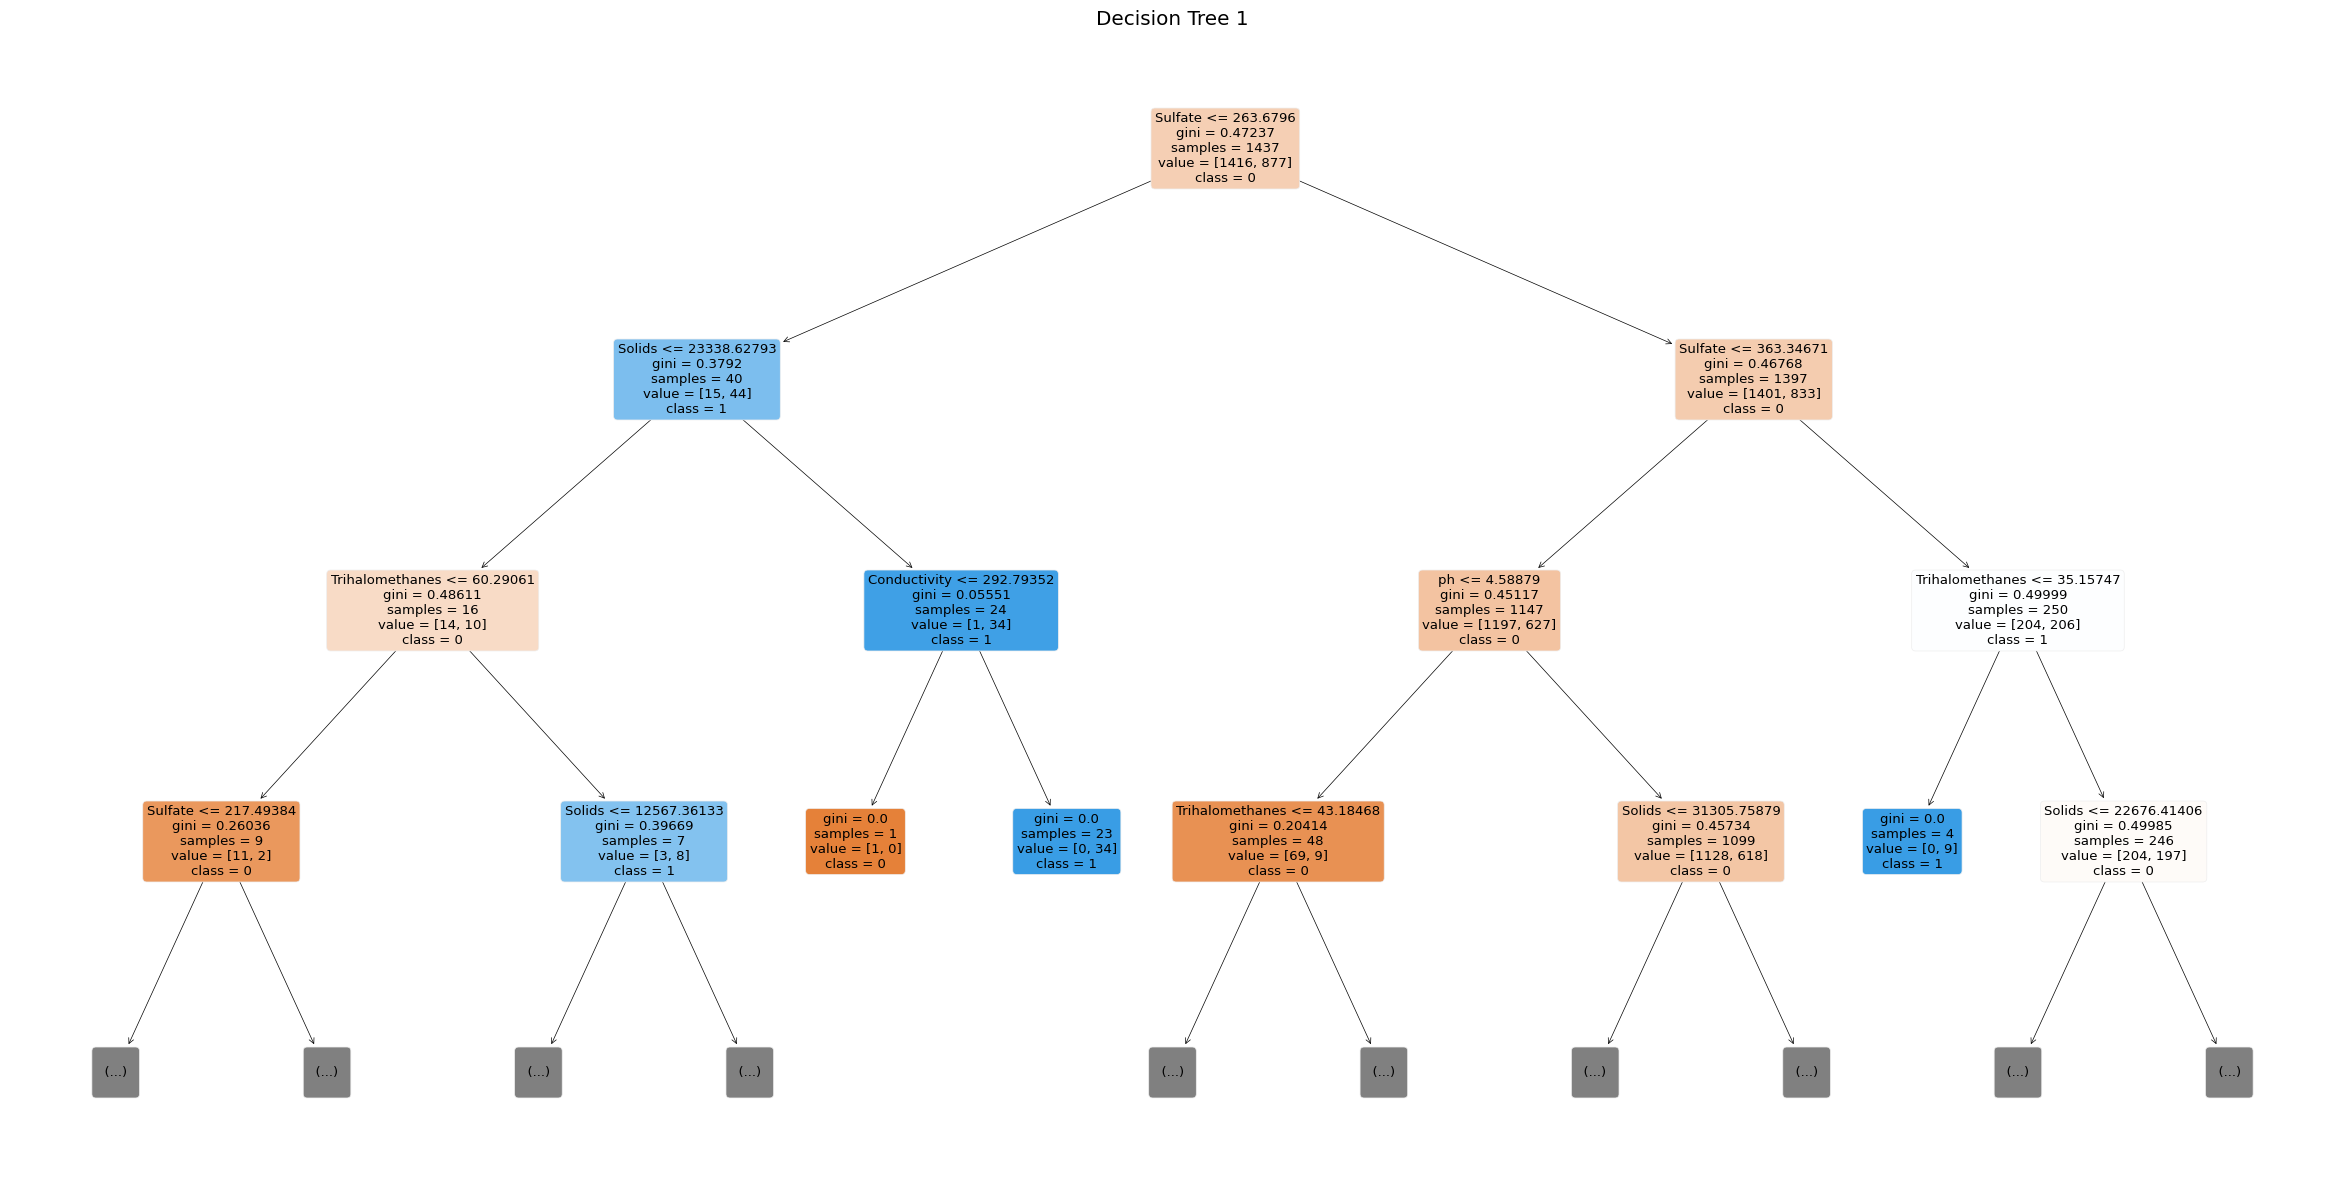

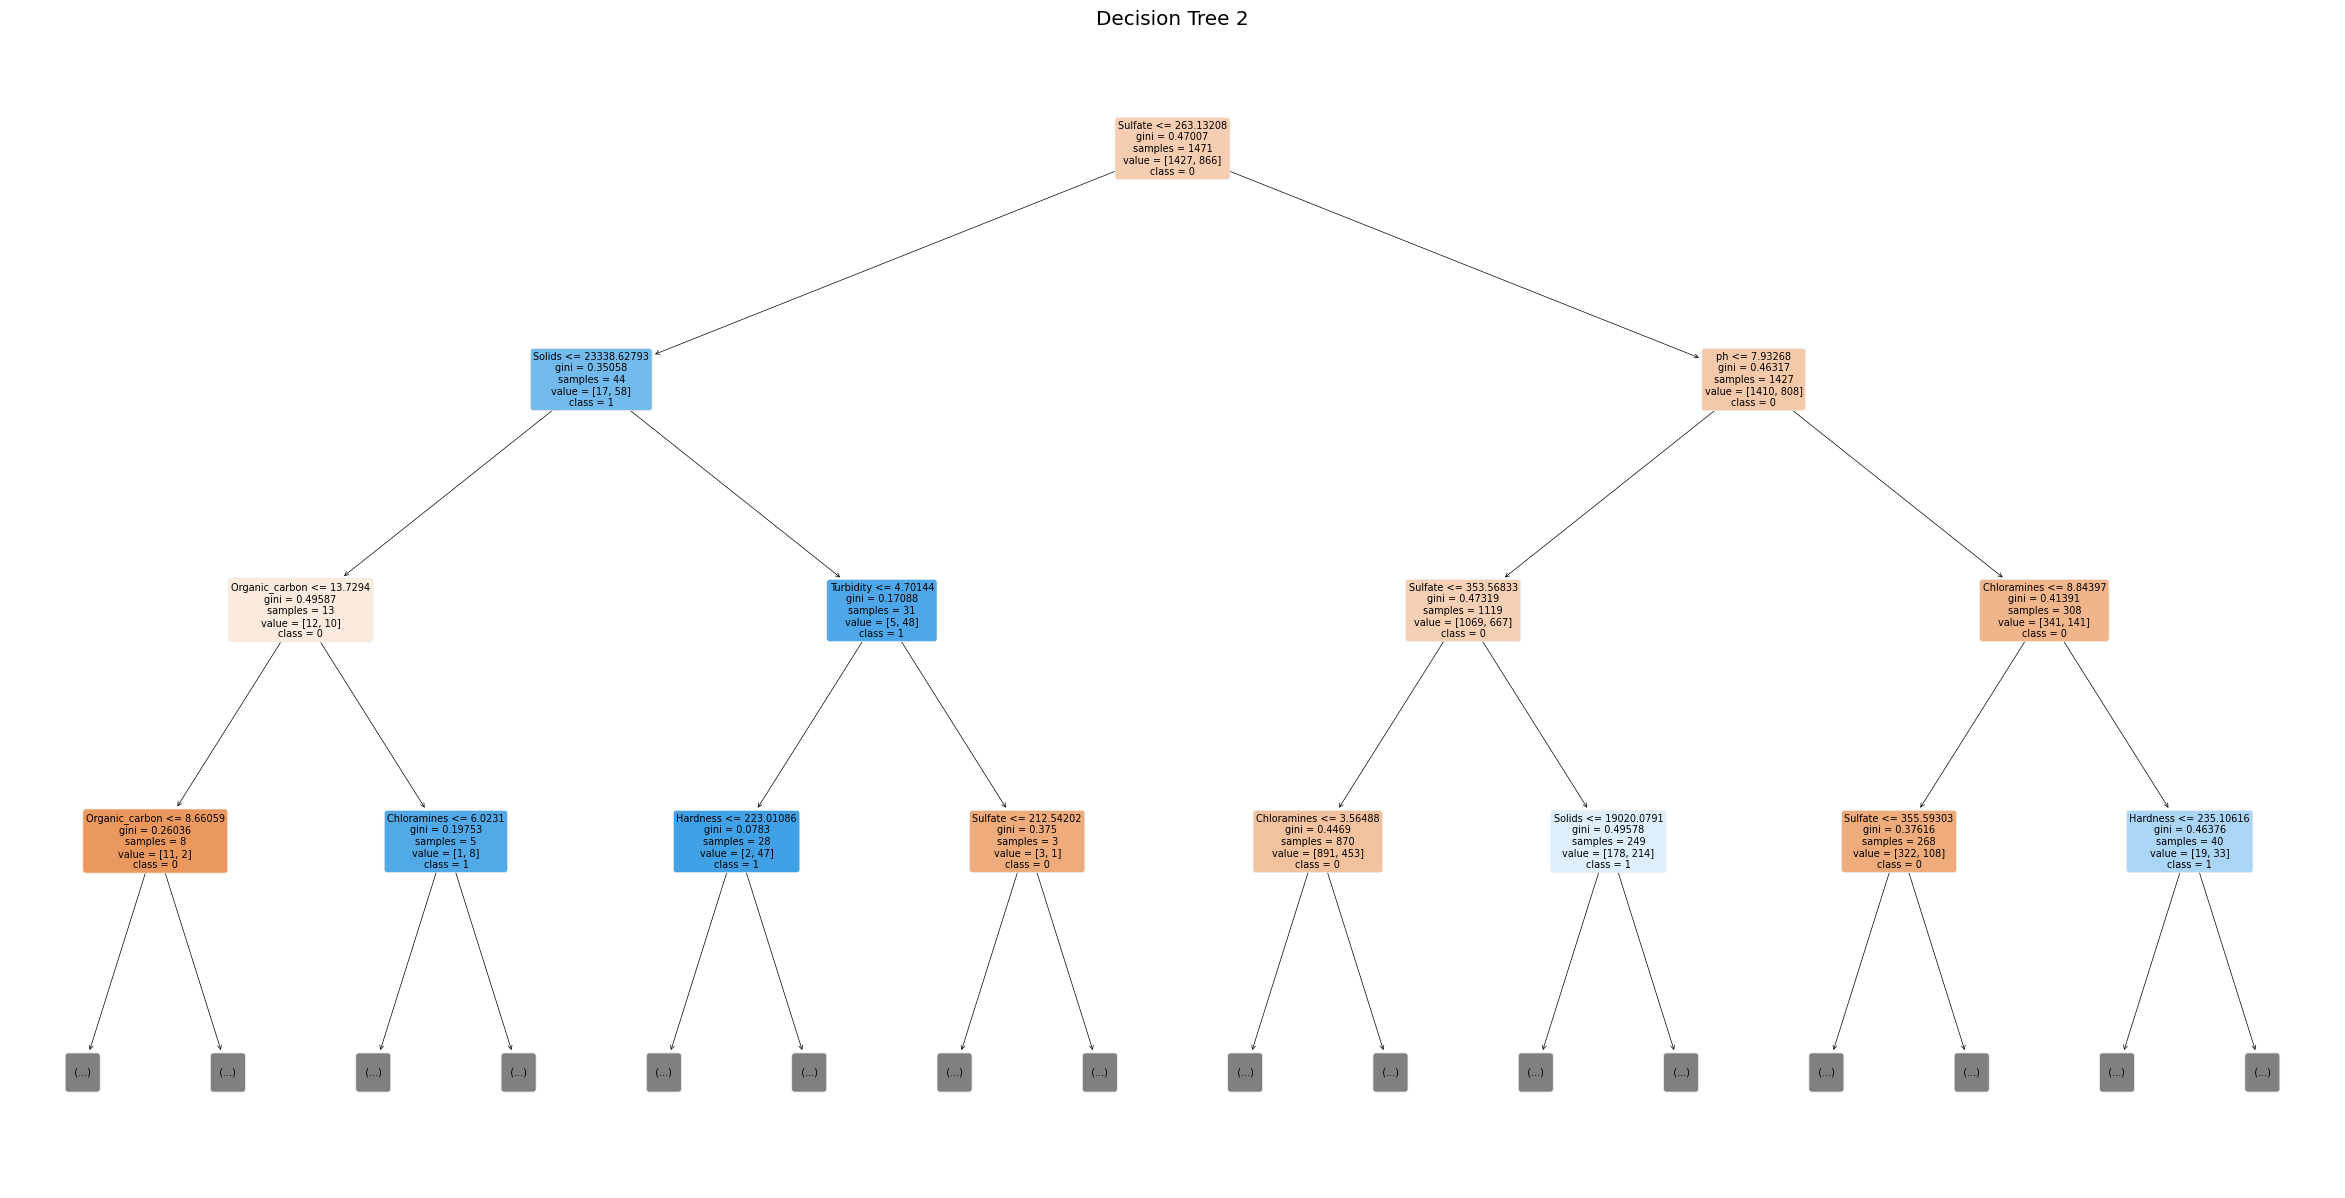

In [51]:
rf_clf = models[1][1]

# Calculate precision scores for all trees
bonus_scores = []

for estimator in rf_clf.estimators_:
    model_result = estimator.predict(X_test)
    score = precision_score(y_test, model_result)
    bonus_scores.append(score)

# Get indices of top 2 trees with highest precision scores
top_2_indices = np.argsort(bonus_scores)[-2:]

# Visualize the top 2 trees with precision scores
for i, index in enumerate(top_2_indices):
    plt.figure(figsize=(30, 15))

    tree.plot_tree(decision_tree=rf_clf.estimators_[index],
                   feature_names=df.columns.tolist()[:-1],
                   class_names=["0", "1"],
                   filled=True,
                   rounded=True,
                   precision=5,
                   max_depth=3)

    plt.title(f"Decision Tree {i+1}")
    plt.show()

# **another model**

In [53]:
# Setting features (X) and targets(y)
X = df.drop('Potability', axis=1)
y = df['Potability']

In [54]:
# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the data. Only training data is fitted, testing data is only transformed
# Also, only x values are scaled, because y only containes values 0 and 1, which we don't want to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

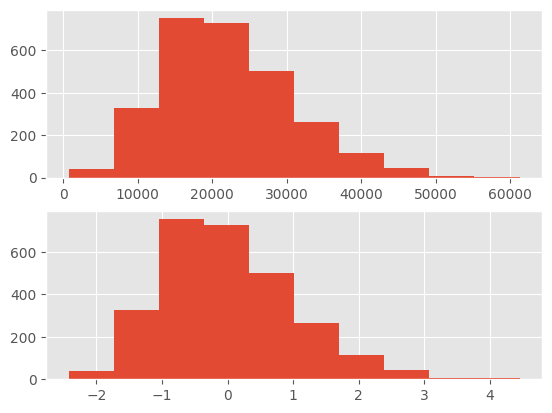

In [55]:
# Creatre figure and list containing axes
fig, ax = plt.subplots(2, 1)

# Plot histogram of before and after scaling
X_train.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(X_train_scaled[:, 2])
plt.show()

In [56]:
# Set up all the models that are to be tested
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

In [57]:
# lr param grid
lr_params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0, 5, 10)}

# Instantiate cross validated logistic regression random search
rs_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_params, cv=5)

# Fit lr to trainig data
rs_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                                        'penalty': ['l1', 'l2']})

In [58]:
# rfc param grid
rfc_params = {
    'n_estimators' : [*range(25, 400, 20)],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated random forest random search
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv=5)

# Fit rfc to trainig data
rs_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [25, 45, 65, 85, 105,
                                                         125, 145, 165, 185,
                                                         205, 225, 245, 265,
                                                         285, 305, 325, 345,
                                                         365, 385]})

In [59]:
# dtc param grid
dtc_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated desicion tree random search
rs_dtc = RandomizedSearchCV(estimator=dtc, param_distributions=dtc_params, cv=5)

# Fit dtc to trainig data
rs_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'splitter': ['best', 'random']})

In [60]:
# xgb param grid
xgb_params = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : np.linspace(0, 1, 10),
    'n_estimators' : [*range(25, 500, 10)]}

# Instantiate cross validated extreme gradient boosting random search
rs_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5)

# Fit xgb to training data
rs_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

/usr/local/lib/python3.10/dist-packages/skle

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'loss': ['deviance', 'exponential'],
                                        'n_estimators': [25, 35, 45, 55, 65, 75,
                                                         85, 95, 105, 115, 125,
                                                         135, 145, 155, 165,
                                                         175, 185, 195, 205,
                                                         215, 225, 235, 245,
                                                         255, 265, 275, 285,
                                                         295, 305, 315, ...]})

In [61]:
# knn param grid
knn_params = {
    'n_neighbors' : [*range(1, 11)],
    'weights' : ['uniform', 'distant'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree' 'brute'],
    'leaf_size' : [10, 20, 30, 40]}

# Instantiate cross validated k-nearest neighbor random search
rs_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_params, cv=5)

# Fit knn to training data
rs_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_treebrute'],
                                        'leaf_size': [10, 20, 30, 40],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distant']})

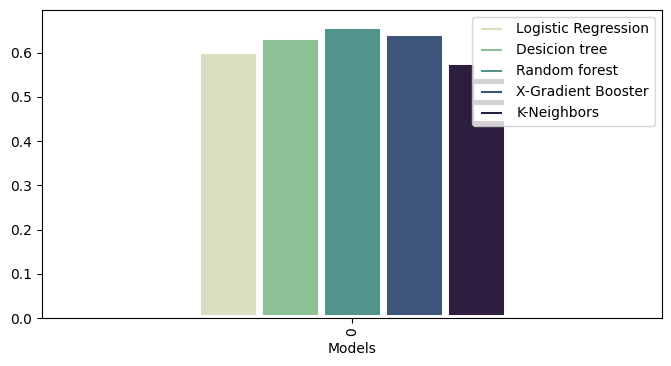

In [62]:
# Set up all models scores as a df
score_df =  pd.DataFrame({'Logistic Regression' :  [rs_lr.best_score_] ,'Desicion tree' : [rs_dtc.best_score_], \
'Random forest' : [rs_rfc.best_score_],'X-Gradient Booster': [rs_xgb.best_score_] ,'K-Neighbors' : [rs_knn.best_score_]})

# Plot bar plot
plt.style.use('default')
color_palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
score_df.plot(kind='bar', edgecolor='white', colormap=color_palette, linewidth=5, figsize=(8, 4), xlabel='Models')

# Show plot
plt.show()

In [63]:
from sklearn.metrics import accuracy_score

# Set up the best classifiert
rfc_v02 = RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=265)

# Train it
rfc_v02.fit(X_train, y_train)

# Predict on unseen data
y_pred = rfc_v02.predict(X_test)

# Get the score of the model
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  65.04065040650406


<Figure size 640x480 with 0 Axes>

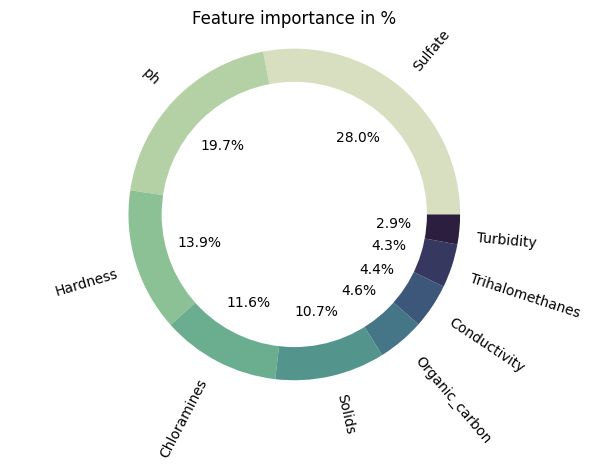

In [64]:
# Get feature importance
feature_imp = pd.Series(rfc_v02.feature_importances_, index=X.columns).sort_values(ascending=False)

# Clear matplotlib
plt.clf()

# Create subplot and pie chart
fig1, ax1 = plt.subplots()
ax1.pie(feature_imp, colors=sns.cubehelix_palette(start=.5, rot=-.75, n_colors=9), labels=feature_imp.index, autopct='%1.1f%%', startangle=0, rotatelabels=True)

#draw circle
centre_circle = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set tighten layout and show plot
plt.title('Feature importance in %')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:43

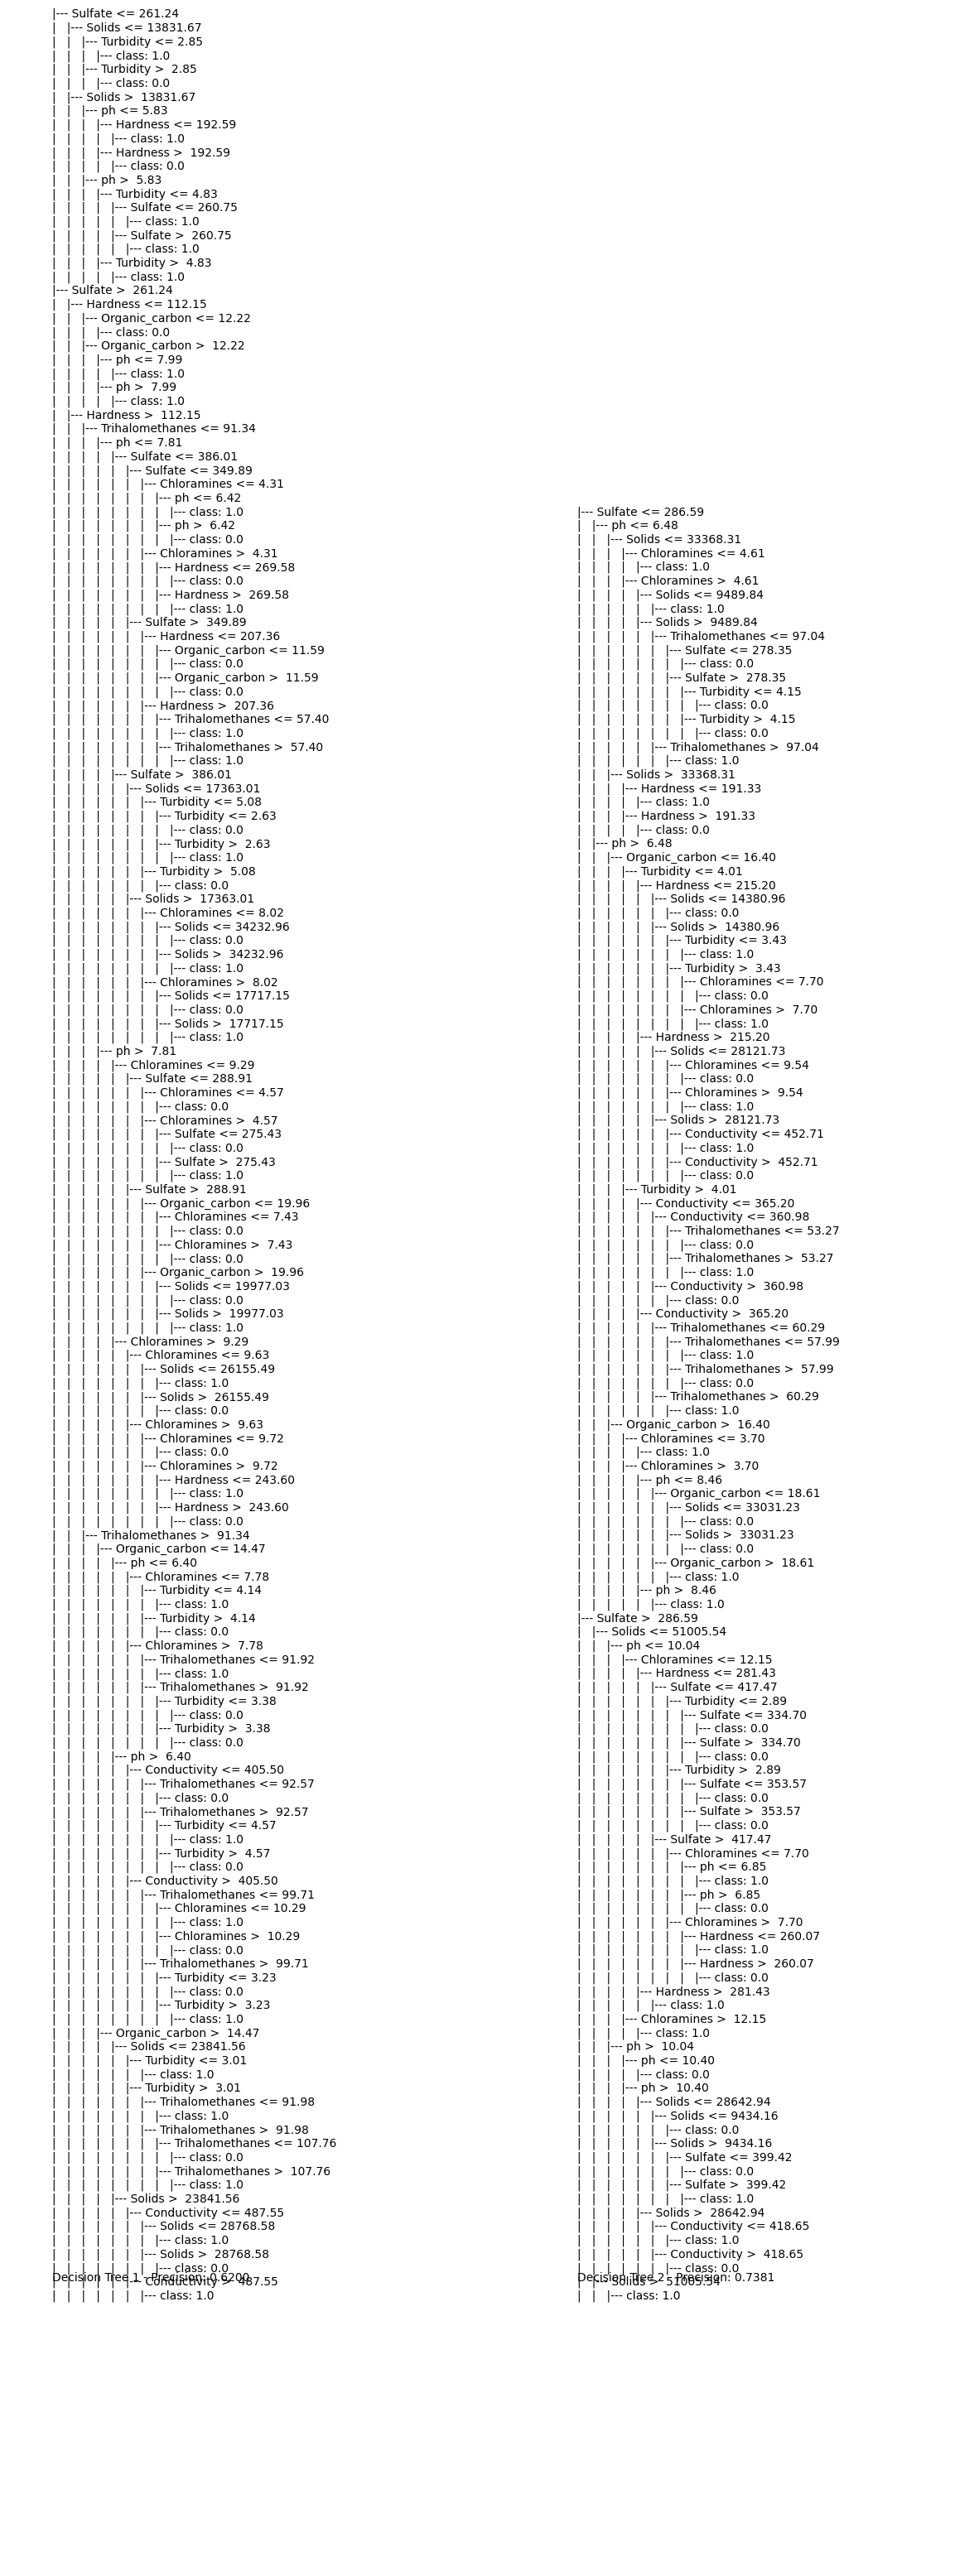

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt

# Your dataset (X_train, y_train) assumed to be defined before

# Define the parameter grid
rfc_params = {
    'n_estimators': [*range(25, 400, 20)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [*range(1, 11)],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Instantiate a RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Instantiate a RandomizedSearchCV
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv=5)

# Fit RandomizedSearchCV to training data
rs_rfc.fit(X_train, y_train)

# Get the best estimator (best random forest model)
best_rfc_model = rs_rfc.best_estimator_

# Now calculate precision scores for each tree in the best model
precision = []
for tree_index in range(len(best_rfc_model.estimators_)):
    tree_predictions = best_rfc_model.estimators_[tree_index].predict(X_test)
    precision.append(precision_score(y_test, tree_predictions))

# Get indices of top 2 trees with highest precision scores
top_2_trees = np.argsort(precision)[-2:]

# Visualize the top 2 trees with precision scores
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for i, tree_index in enumerate(top_2_trees):
    plt.figure(figsize=(20, 10))

    tree_rules = export_text(best_rfc_model.estimators_[tree_index], feature_names=X_test.columns.tolist())

    ax[i].text(0.1, 0.9, f"Decision Tree {i+1} - Precision: {precision[tree_index]:.4f}", transform=ax[i].transAxes)
    ax[i].text(0.1, 0.8, tree_rules, transform=ax[i].transAxes)

    ax[i].axis('off')

plt.show()
